In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aids/diabetes.csv')
print(data.head())
print(data.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [3]:
!pip install ydata-profiling

In [4]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_notebook_iframe()


Output hidden; open in https://colab.research.google.com to view.

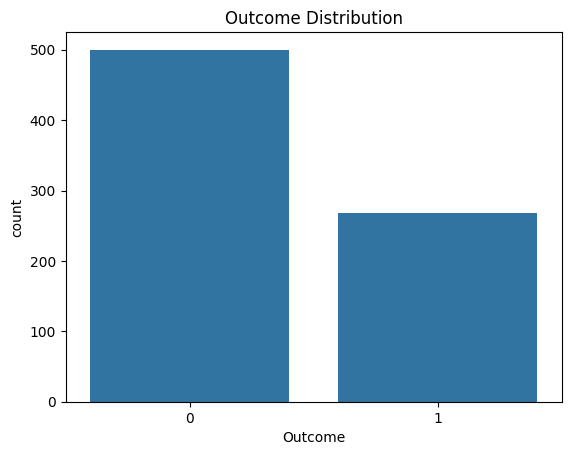

In [5]:
sns.countplot(x='Outcome', data=data)
plt.title('Outcome Distribution')
plt.show()


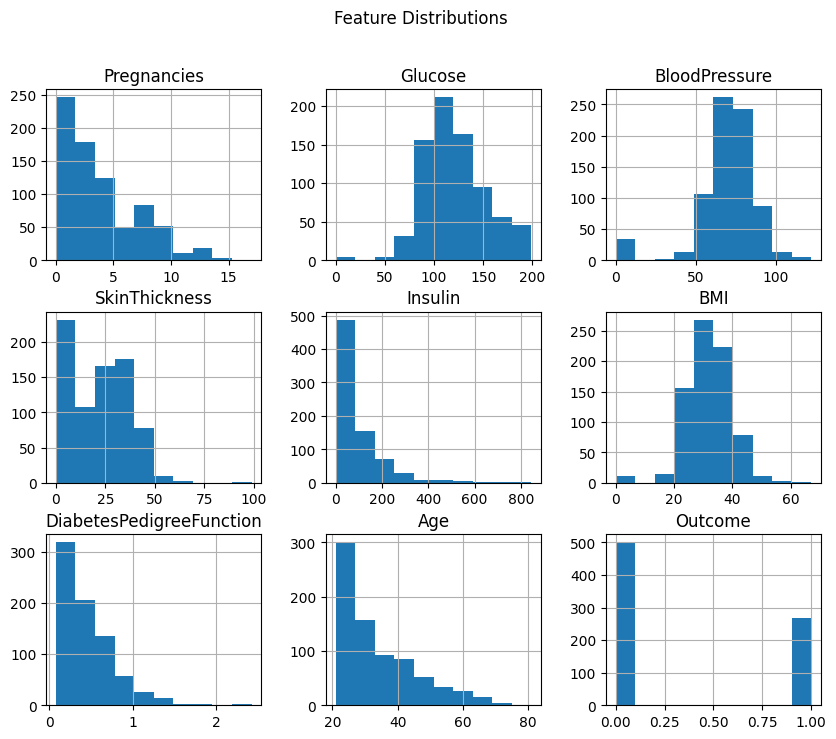

In [6]:
data.hist(figsize=(10, 8))
plt.suptitle('Feature Distributions')
plt.show()


In [7]:
print((data == 0).sum())


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


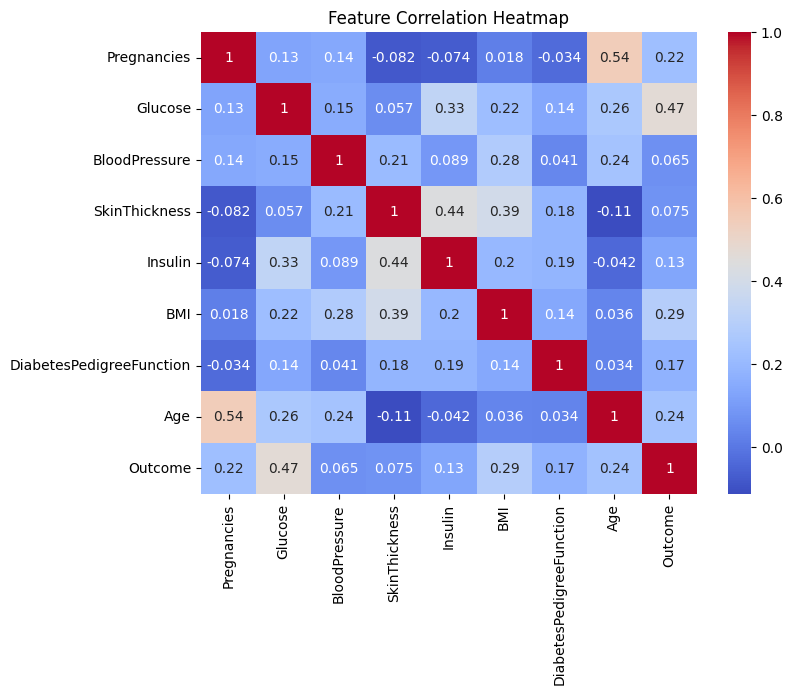

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [9]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
    data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Outcome']))
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[:-1])


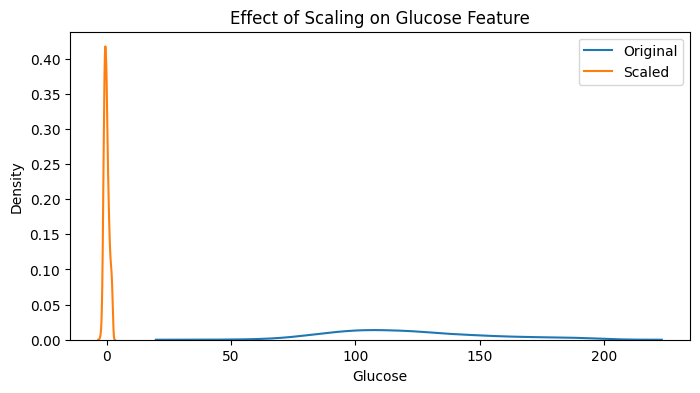

In [11]:
plt.figure(figsize=(8,4))
sns.kdeplot(data['Glucose'], label='Original')
sns.kdeplot(scaled_df['Glucose'], label='Scaled')
plt.title('Effect of Scaling on Glucose Feature')
plt.legend()
plt.show()
